<a href="https://colab.research.google.com/github/saudyusaf/data-science/blob/main/program14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# a) Conduct Exploratory Data Analysis (EDA)
import pandas as pd
df = pd.read_csv('/content/Wine_Quality.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df['quality'].value_counts())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

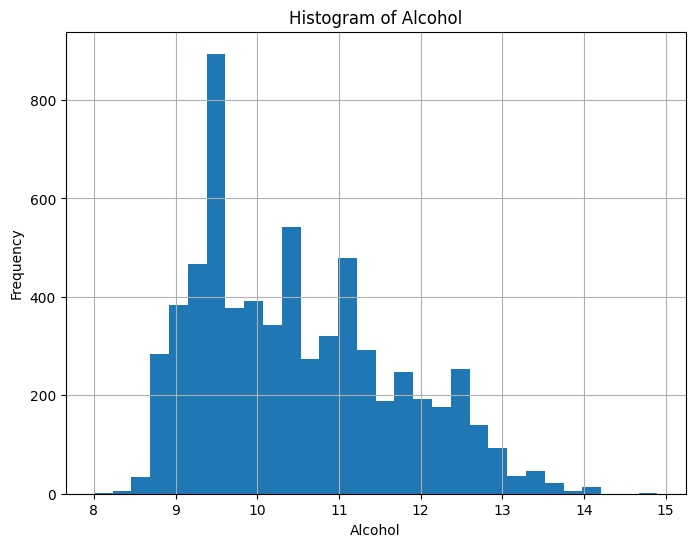

In [4]:

#b) Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# (i) Histogram for a feature like 'alcohol'
plt.figure(figsize=(8, 6))
df['alcohol'].hist(bins=30)
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

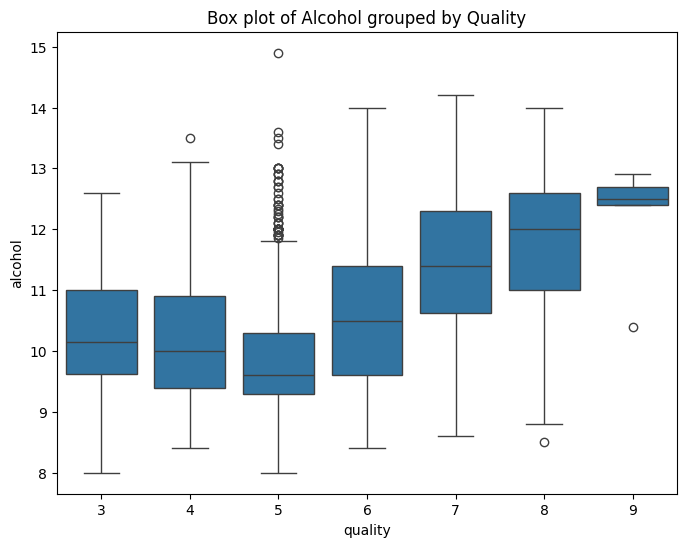

In [5]:

# (ii) Box plot for 'alcohol' grouped by 'quality'
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Box plot of Alcohol grouped by Quality")
plt.show()


In [7]:
#c) Implement Naïve Bayes Classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
X = df.drop(columns=['quality', 'quality_label', 'type']) # Drop 'type' column
y = df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_rep)

Accuracy: 77.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.85      1047
           1       0.45      0.66      0.54       253

    accuracy                           0.78      1300
   macro avg       0.68      0.74      0.70      1300
weighted avg       0.82      0.78      0.79      1300

